In [63]:
# Python script to plot 
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from astropy.time import Time

## Load all light curves

In [3]:
obj_Id='SN 2023ixf'
fild = 'data/light_curve/'+ obj_Id.replace(" ","_").lower()
# AAVSO data
fil_aavso_CV = fild+'_early_aavso_CV.dat'
# Circulars/Telegrams data
fil_B = fild+'_early_B.dat'
fil_V = fild+'_early_V.dat'
fil_R = fild+'_early_R.dat'
fil_g = fild+'_early_g.dat'
fil_r = fild+'_early_r.dat'
fil_clear = fild+'_early_clear.dat'
fil_itagaki = fild+'_early_itagaki_clear.dat'
fil_citizen_V = fild+'_early_citizen_V.dat'
fil_CV = fild+'_early_CV.dat'
fil_ztf_g = fild+'_early_ztf_g.dat'
# Upper limit data 
fil_g_upper = fild+'_early_g_upper.dat'
fil_o_upper = fild+'_early_o_upper.dat'
fil_clear_upper = fild+'_early_clear_upper.dat'
fil_CV_upper = fild+'_early_CV_upper.dat'
# AAVSO photometric data
mjd_aavso_CV,mag_aavso_CV,magerr_aavso_CV=np.loadtxt(fil_aavso_CV,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
# Circulars/telegrams/prepints photometric data
mjd_B,mag_B,magerr_B=np.loadtxt(fil_B,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_V,mag_V,magerr_V=np.loadtxt(fil_V,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)#
mjd_R,mag_R,magerr_R=np.loadtxt(fil_R,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_g,mag_g,magerr_g=np.loadtxt(fil_g,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_r,mag_r,magerr_r=np.loadtxt(fil_r,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_clear,mag_clear,magerr_clear=np.loadtxt(fil_clear,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_clear_itagaki,mag_clear_itagaki,magerr_clear_itagaki=np.loadtxt(fil_itagaki,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_citizen_V,mag_citizen_V,magerr_citizen_V=np.loadtxt(fil_citizen_V,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
mjd_CV,mag_CV,magerr_CV=np.loadtxt(fil_CV,unpack=True,usecols=(0,1,2),delimiter=',',skiprows=1)
# Non detectioss (N.D.)
mjd_g_upper,mag_g_upper=np.loadtxt(fil_g_upper,unpack=True,usecols=(0,1),delimiter=',',skiprows=1)
mjd_o_upper,mag_o_upper=np.loadtxt(fil_o_upper,unpack=True,usecols=(0,1),delimiter=',',skiprows=1)
mjd_clear_upper,mag_clear_upper=np.loadtxt(fil_clear_upper,unpack=True,usecols=(0,1),delimiter=',',skiprows=1)
mjd_CV_upper,mag_CV_upper=np.loadtxt(fil_CV_upper,unpack=True,usecols=(0,1),delimiter=',',skiprows=1)


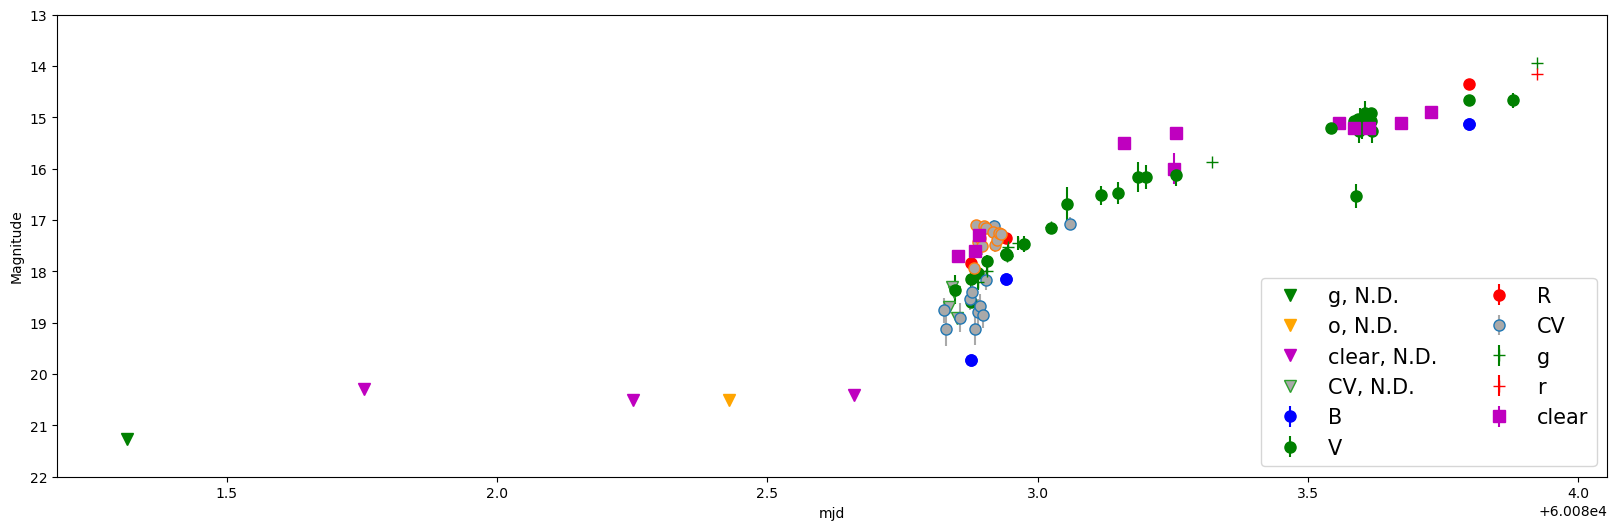

In [8]:
# Duty cycle figure with days from explosion as abscissa
fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = plt.gca()
# Duty cycle as inset in figure of early photometry
ax1.errorbar(mjd_B,mag_B,magerr_B,fmt='bo',markersize=8,ls='',label='B')
ax1.errorbar(mjd_V,mag_V,magerr_V,fmt='go',markersize=8,ls='',label='V')#
ax1.errorbar(mjd_R,mag_R,magerr_R,fmt='ro',markersize=8,ls='',label='R')
ax1.errorbar(mjd_CV,mag_CV,magerr_CV,marker='o',markerfacecolor='darkgrey',ecolor='darkgrey',markersize=8,ls='',label='CV')
ax1.errorbar(mjd_aavso_CV,mag_aavso_CV,magerr_aavso_CV,marker='o',markerfacecolor='darkgrey',ecolor='darkgrey',markersize=8,ls='')
ax1.errorbar(mjd_g,mag_g,magerr_g,fmt='g+',markersize=8,ls='',label='g')
ax1.errorbar(mjd_r,mag_r,magerr_r,fmt='r+',markersize=8,ls='',label='r')
ax1.errorbar(mjd_clear,mag_clear,magerr_clear,fmt='ms',markersize=8,ls='',label='clear')
ax1.plot(mjd_clear_itagaki,mag_clear_itagaki, 'ms',markersize=8)
ax1.errorbar(mjd_citizen_V,mag_citizen_V,magerr_citizen_V,fmt='go',markersize=8,ls='')
ax1.plot(mjd_g_upper,mag_g_upper,'gv',markersize=8,label='g, N.D.')
ax1.plot(mjd_o_upper,mag_o_upper,marker='v',color='orange',linestyle='',markersize=8,label='o, N.D.')
ax1.plot(mjd_clear_upper,mag_clear_upper,'mv',markersize=8,label='clear, N.D.')
ax1.plot(mjd_CV_upper,mag_CV_upper,marker='v',markerfacecolor='darkgrey',markersize=8,ls='',label='CV, N.D.')
ax1.set_xlabel('mjd')
ax1.set_ylabel('Magnitude')
#ax1.set_xlim([-2,1.2])
ax1.set_ylim([22,13])
##ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}')) 
#ax1.axvline(x=0,color='k',linewidth=1,linestyle='--')
#ax1.annotate(r'$t_2$',(60082.85-t2, 14),fontsize=30)
#ax1.annotate('SN 2023ixf', (60081.1-t2, 20), fontsize=22)
ax1.legend(ncol=2,fontsize=15,loc='lower right',frameon=True)

## Fit

In [11]:
import GPR_kernels as kernels

In [46]:
t = mjd_V
time = t - np.min(t)
mag = mag_V

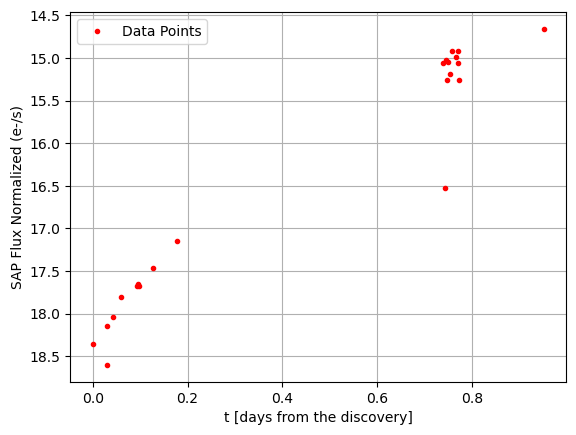

In [47]:
# Plot the data points
X = np.array(time)
y = np.array(mag)
plt.plot(X, y,'.', color = 'red', label = 'Data Points') 
plt.xlabel('t [days from the discovery]')
plt.ylabel('SAP Flux Normalized (e-/s)')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()

In [14]:
Xp, yp, ystd = kernels.GPR_fit(X,y)

Kernel type: Sum
Optimized hyperparameters:
  k1__k1__p0: 1e-06  (bounds: [[1.e-06 1.e+02]])
  k1__k1__p1: 1.07195  (bounds: [[1.e-06 1.e+02]])
  k1__k1__p2: 1e-06  (bounds: [[1.e-06 1.e+02]])
  k1__k1__p3: 1e-06  (bounds: [[1.e-06 1.e+02]])
  k1__k1__p4: 1e-06  (bounds: [[1.e-06 1.e+02]])
  k1__k2__alpha: 0.00432872  (bounds: [[1.e-06 1.e+02]])
  k1__k2__beta: 0.000465602  (bounds: [[1.e-06 1.e+02]])
  k1__k2__delta: 0.000187568  (bounds: [[1.e-06 1.e+02]])
  k1__k2__gamma: 1e-06  (bounds: [[1.e-06 1.e+02]])
  k2__noise_level: 0.0616476  (bounds: [[1.e-06 1.e+02]])


/cvmfs/software.igwn.org/conda/envs/igwn-py310/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__p0 is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/cvmfs/software.igwn.org/conda/envs/igwn-py310/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__p2 is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/cvmfs/software.igwn.org/conda/envs/igwn-py310/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__p3 is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/cvmfs/

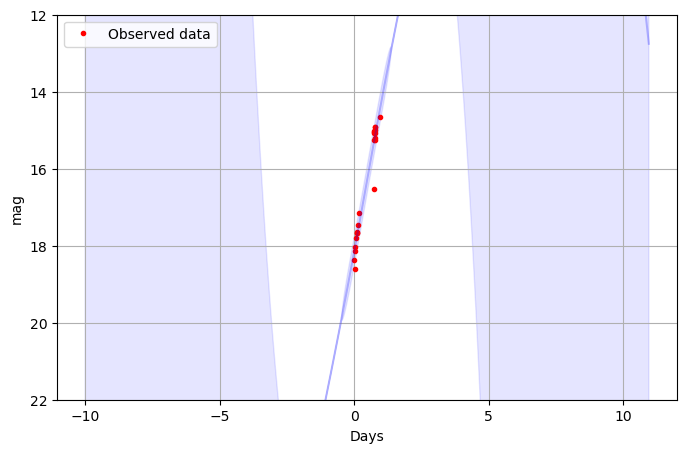

In [15]:
plt.figure(figsize=(8,5))
plt.plot(X, y, 'r.', label='Observed data')
#plt.axhline(np.array(df_bkg['mag']), color='black', linestyle='-',label="BKG")
plt.plot(Xp, yp, color='blue', alpha=0.25)
plt.fill_between(Xp, yp-ystd, yp+ystd, alpha=0.1,color='b')
plt.xlabel('Days')
plt.ylabel('mag')
plt.ylim([12,22])
plt.gca().invert_yaxis()
#plt.plot(t_sbo,ave_BKG,marker="*",markersize=15,label="t_SBO",color='y')
plt.grid()
plt.legend()

### t_SBO

In [21]:
mjd_BKG = mjd_clear_upper[-1]
mag_BKG = mag_clear_upper[-1]

print (mjd_BKG, mag_BKG)

60082.66041667 20.4


In [60]:
t_sbo = Xp[np.argmin(np.abs(yp - mag_BKG ))]
t_sbo_l = Xp[np.argmin(np.abs(yp-ystd - mag_BKG ))]
t_sbo_r = Xp[np.argmin(np.abs(yp+ystd - mag_BKG ))]
mag_sbo = yp[np.argmin(np.abs(yp - mag_BKG ))]
t_sbo_mjd = t_sbo  + np.min(t)
print ("The predicted shock break out time is between",t_sbo_l+np.min(t)," and ",t_sbo_r+np.min(t)," in MJD")

The predicted shock break out time is between 60082.22073622705  and  60082.22073622705  in MJD


In [61]:
Xp_mjd = Xp + np.min(t)


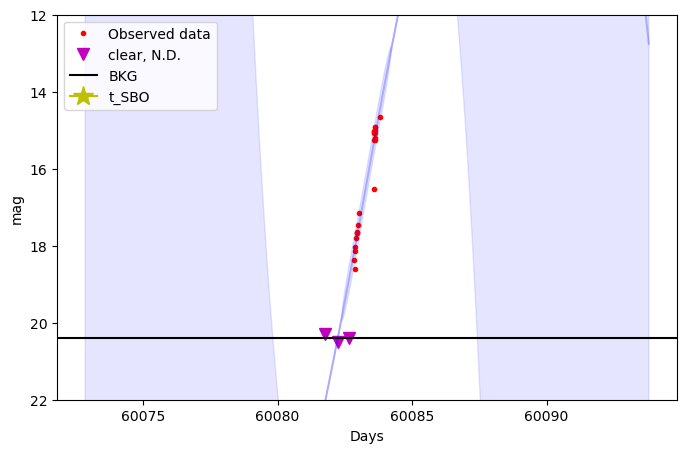

In [62]:
plt.figure(figsize=(8,5))

plt.plot(t, mag, 'r.', label='Observed data')
plt.plot(mjd_clear_upper, mag_clear_upper, 'mv',markersize=8,label='clear, N.D.')
plt.plot(Xp_mjd, yp, color='blue', alpha=0.25)
plt.fill_between(Xp_mjd, yp-ystd, yp+ystd, alpha=0.1,color='b')
plt.axhline(np.array(mag_BKG), color='black', linestyle='-',label="BKG")
plt.plot(t_sbo_mjd,mjd_BKG,marker="*",markersize=15,label="t_SBO",color='y')
plt.ylim([12,22])
plt.xlabel('Days')
plt.ylabel('mag')
plt.legend()
plt.gca().invert_yaxis()

In [66]:
utc = Time(t_sbo_mjd, format='mjd').iso
gps = Time(t_sbo_mjd, format='mjd').gps
print (utc,gps)

2023-05-18 05:17:51.610 1368422289.610017
